<h1>준비</h1>

In [12]:
data_path = './input/data/train' 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


In [143]:
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(0))
converted_time

'1970-01-01 00:00:00'

In [15]:
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t') # 영화 year
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')


In [16]:
train_df['time_date'] = pd.to_datetime(train_df['time'], unit='s')
train_df['time_year'] = train_df['time_date'].dt.year
train_df['time_month'] = train_df['time_date'].dt.month
train_df['time_hour'] = train_df['time_date'].dt.hour
train_df['time_day'] = train_df['time_date'].dt.dayofweek

In [37]:
writer_df = pd.merge(train_df, writer_data, on=['item'])
director_df = pd.merge(train_df, director_data, on=['item'])
title_df = pd.merge(train_df, title_data, on=['item'])
genre_df = pd.merge(train_df, genre_data, on=['item'])

In [40]:
genre_data.sample(5)

,item,genre
8018,1367,Adventure
9881,36509,Adventure
3372,1949,Drama
11729,3591,Comedy
15561,2051,Children


In [17]:
train_df.sample(5)

,user,item,time,time_date,time_year,time_month,time_hour,time_day
25265,729,2628,1241020425,2009-04-29 15:53:45,2009,4,15,2
3124215,83396,6942,1329585709,2012-02-18 17:21:49,2012,2,17,5
1294643,34359,3735,1410006369,2014-09-06 12:26:09,2014,9,12,5
2863860,76501,27904,1176307037,2007-04-11 15:57:17,2007,4,15,2
4522969,120942,39449,1149389634,2006-06-04 02:53:54,2006,6,2,6


In [23]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [45]:
train_df.describe

<bound method NDFrame.describe of            user   item        time           time_date  time_year  time_month  \
0            11   4643  1230782529 2009-01-01 04:02:09       2009           1   
1            11    170  1230782534 2009-01-01 04:02:14       2009           1   
2            11    531  1230782539 2009-01-01 04:02:19       2009           1   
3            11    616  1230782542 2009-01-01 04:02:22       2009           1   
4            11   2140  1230782563 2009-01-01 04:02:43       2009           1   
...         ...    ...         ...                 ...        ...         ...   
5154466  138493  44022  1260209449 2009-12-07 18:10:49       2009          12   
5154467  138493   4958  1260209482 2009-12-07 18:11:22       2009          12   
5154468  138493  68319  1260209720 2009-12-07 18:15:20       2009          12   
5154469  138493  40819  1260209726 2009-12-07 18:15:26       2009          12   
5154470  138493  27311  1260209807 2009-12-07 18:16:47       2009          

In [76]:
every = pd.merge(train_df, writer_data, on=['item'])
every = pd.merge(every, director_data, on=['item'])
every = pd.merge(every, title_data, on=['item'])
every = pd.merge(every, genre_data, on=['item'])
every.sample(5)

,user,item,time,time_date,time_year,time_month,time_hour,time_day,writer,director,title,genre
9453669,4627,1,1288617939,2010-11-01 13:25:39,2010,11,13,0,nm0710020,nm0005124,Toy Story (1995),Animation
45816758,80668,2734,1125345826,2005-08-29 20:03:46,2005,8,20,0,nm0001707,nm0001837,"Mosquito Coast, The (1986)",Adventure
25140561,83234,1704,1297054618,2011-02-07 04:56:58,2011,2,4,0,nm0000354,nm0001814,Good Will Hunting (1997),Romance
38232884,18078,1374,1130170130,2005-10-24 16:08:50,2005,10,16,0,nm0071790,nm0583292,Star Trek II: The Wrath of Khan (1982),Adventure
7601200,119833,6377,1406775654,2014-07-31 03:00:54,2014,7,3,3,nm0721675,nm0881279,Finding Nemo (2003),Comedy


<h1>영화 side information 탐색 - 데이터는 약 5백만개, 사용자 약 31000명, 영화 약 6800개</h1>

In [54]:
train_df.count()

user          5154471
item          5154471
time          5154471
time_date     5154471
time_year     5154471
time_month    5154471
time_hour     5154471
time_day      5154471
dtype: int64

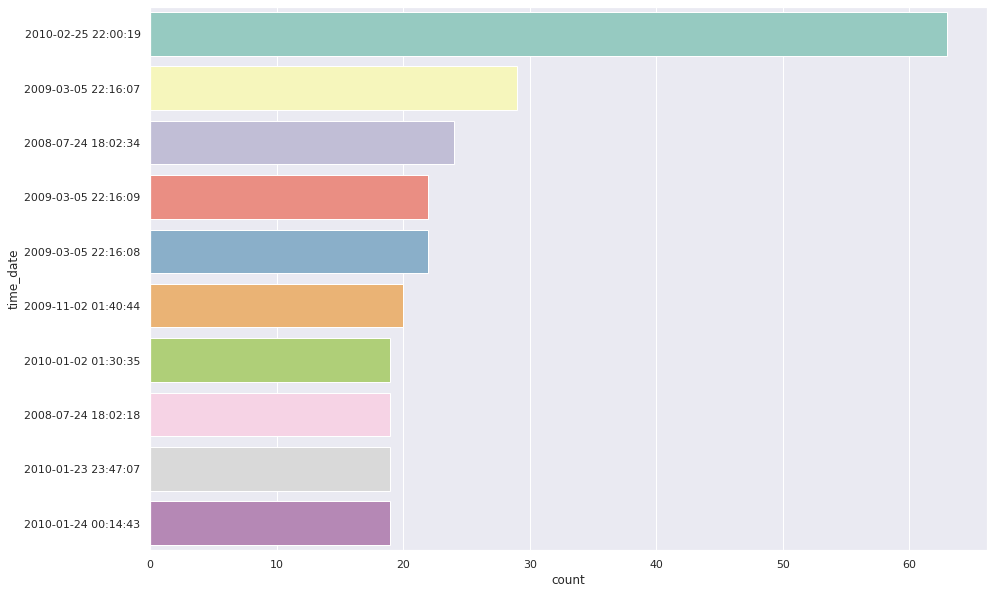

In [56]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="time_date", data=train_df, palette="Set3",\
                   order=train_df['time_date'].value_counts().index[0:10])

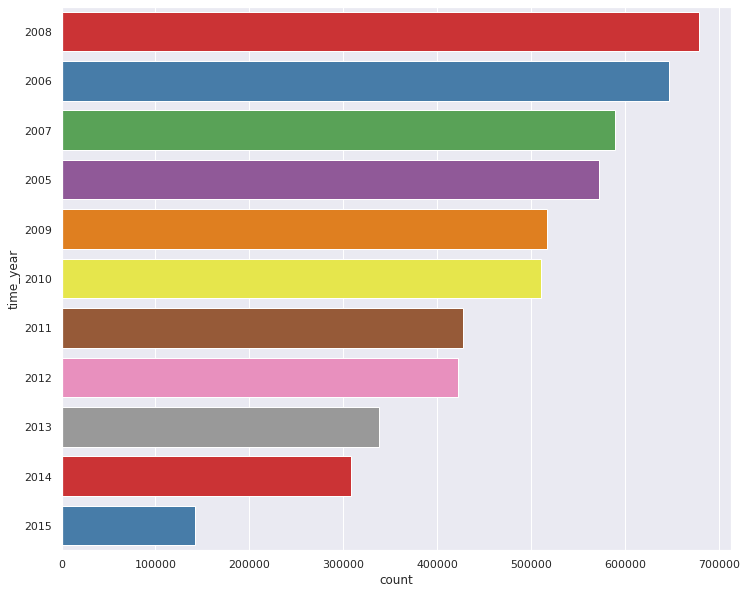

In [140]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="time_year", data=train_df, palette="Set1",\
                   order=train_df['time_year'].value_counts().index[0:10])

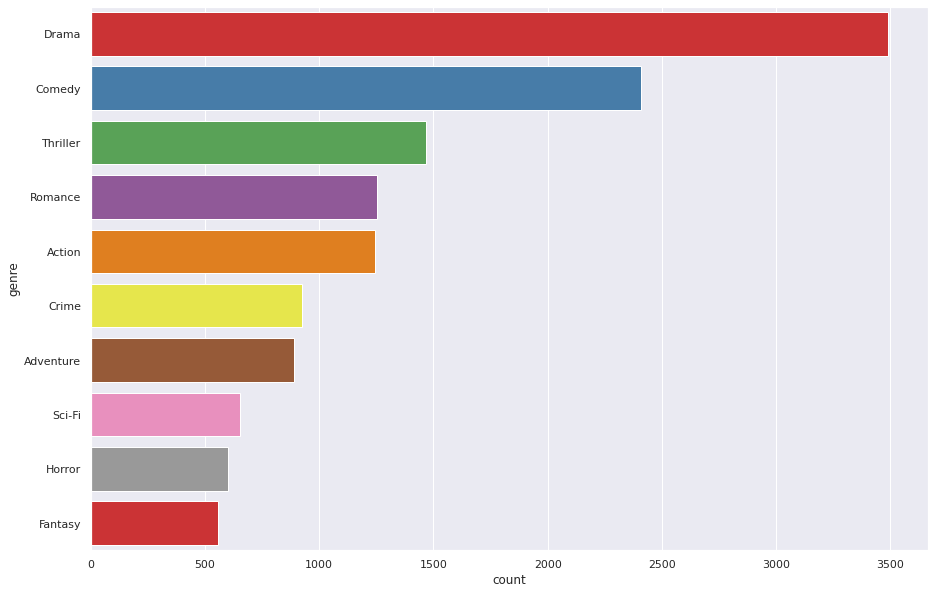

In [47]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="genre", data=genre_data, palette="Set1",\
                   order=genre_data['genre'].value_counts().index[0:10])

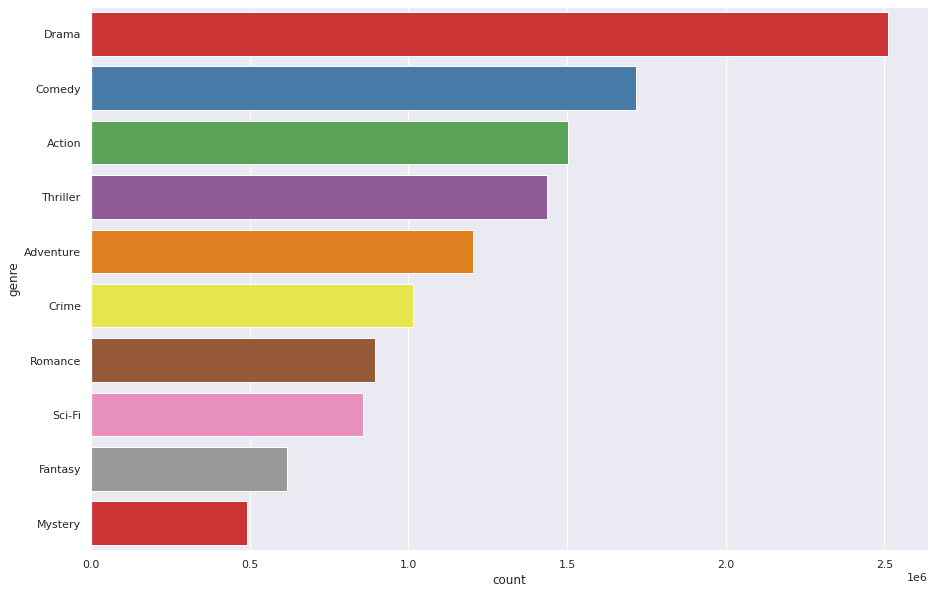

In [46]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="genre", data=genre_df, palette="Set1",\
                   order=genre_df['genre'].value_counts().index[0:10])

In [ ]:
writers = list(writer_df['writer'].unique()) # 2989, 데이터 채우는데 약 40분 소요 ㄷ
i = 0
for w in writers:
    print(i)
    i += 1
    click = len(writer_df[writer_df['writer'] == w])
    clicks.append(click)

In [201]:
click_cp = clicks # 인덱스 프린트 찍어놓거 없애기 위해 리스트 복사
np.set_printoptions(precision=6, suppress=True)
percentage = np.percentile(clicks, [0, 25, 50, 75, 95 ,100]) # 사분위수
print(f'25분위수: {percentage[1]}\n50분위수: {percentage[2]}\n100분위수: {percentage[3]}')

25분위수: 466.0
50분위수: 1336.0
100분위수: 3875.0


/tmp/ipykernel_2051/1911915512.py:3: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


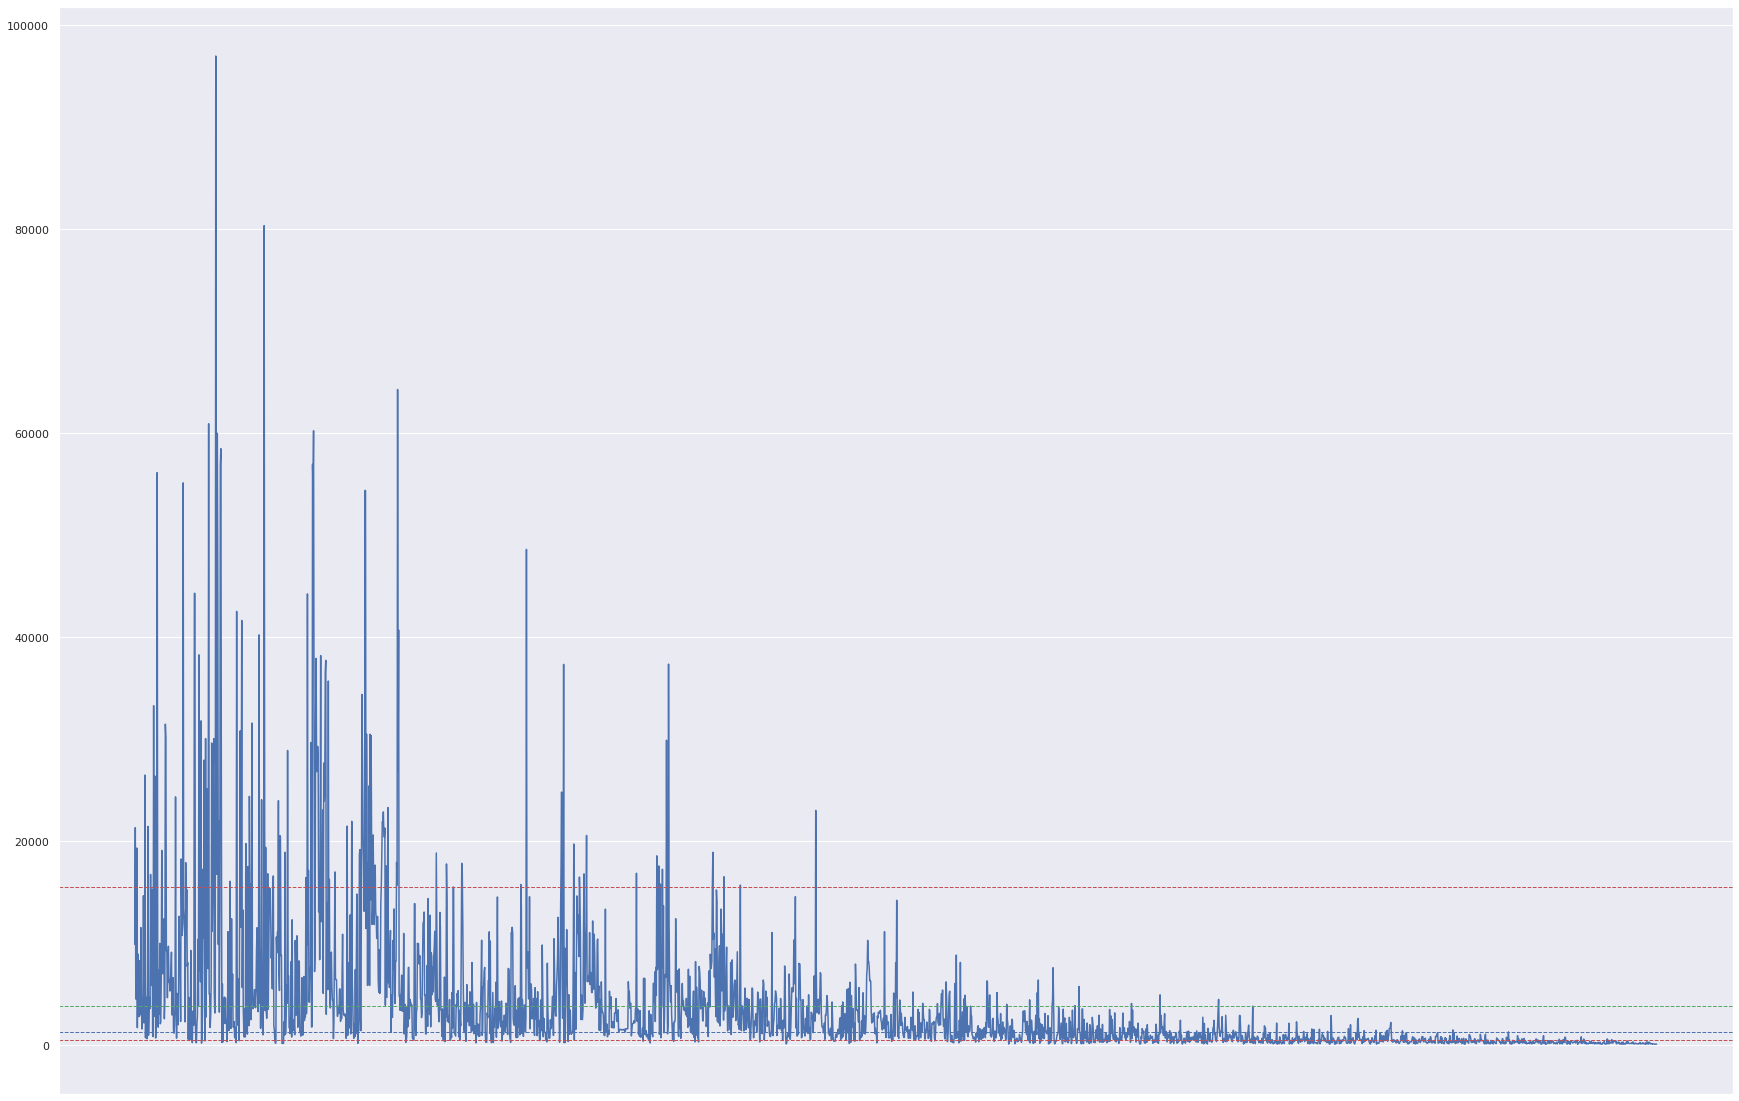

In [202]:
plt.figure(figsize=(30,20))
sns.lineplot(x = writers, y = clicks)
plt.xticks([])
plt.axhline(y=percentage[1], color='r', linewidth=1, linestyle='--') #25퍼
plt.axhline(y=percentage[2], color='b', linewidth=1, linestyle='--') #50퍼
plt.axhline(y=percentage[3], color='g', linewidth=1, linestyle='--') #75퍼
plt.axhline(y=percentage[4], color='r', linewidth=1, linestyle='--') #95퍼
plt.show()

In [203]:
import statistics

print(f'작가당 평균 클릭수: {statistics.mean(clicks)}\n 최소 클릭 작가의 클릭수: {min(clicks)}\n 최대 클릭 작가의 클릭수: {max(clicks)}')

작가당 평균 클릭수: 3773.474406155905
 최소 클릭 작가의 클릭수: 85
 최대 클릭 작가의 클릭수: 96994


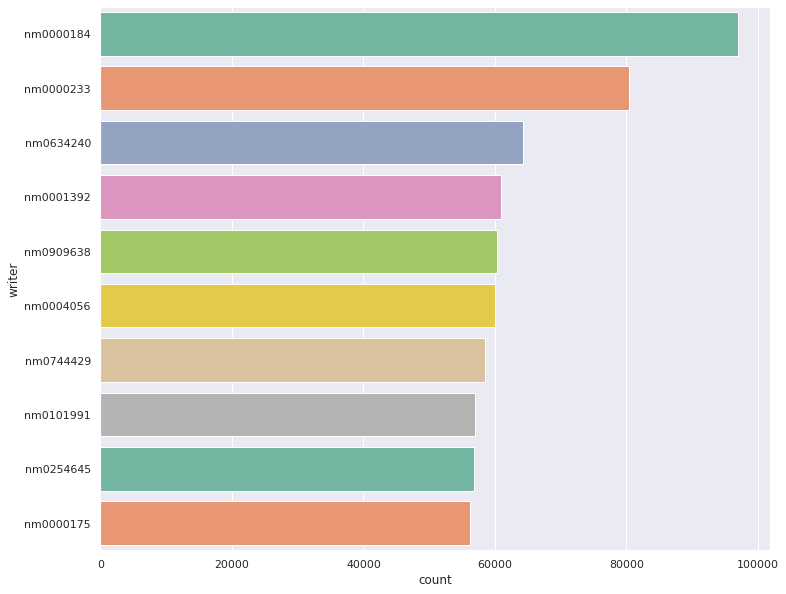

In [43]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="writer", data=writer_df, palette="Set2",\
                   order=writer_df['writer'].value_counts().index[0:10])

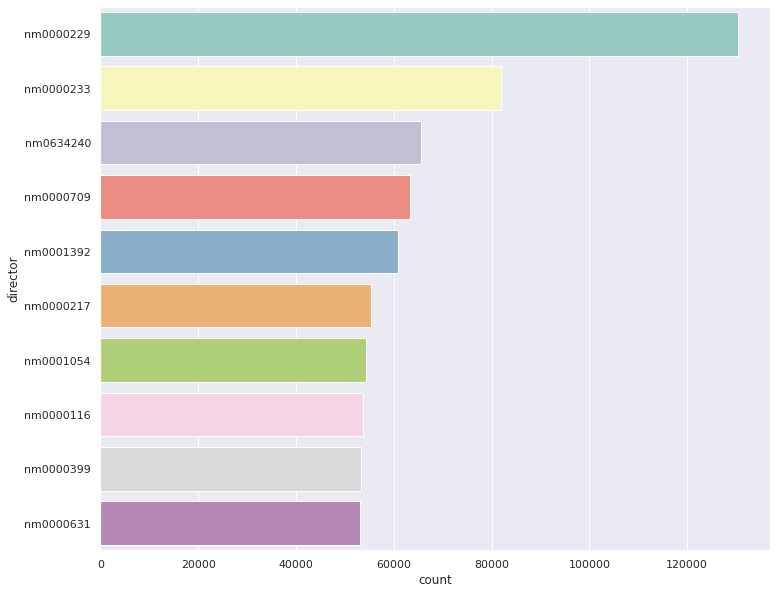

In [48]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="director", data=director_df, palette="Set3",\
                   order=director_df['director'].value_counts().index[0:10])

In [ ]:
인기 감독과 클릭 수

In [175]:
directors = list(director_df['director'].unique())
len(directors)

1340

In [ ]:
directors = list(director_df['director'].unique()) # 1340
clicks = []
i = 0
for d in directors:
    print(i)
    i += 1
    click = len(director_df[director_df['director'] == d])
    clicks.append(click)

In [194]:
click_cp = clicks # 인덱스 프린트 찍어놓거 없애기 위해 리스트 복사
np.set_printoptions(precision=6, suppress=True)
percentage = np.percentile(clicks, [0, 25, 50, 75, 95 ,100]) # 사분위수
print(f'25분위수: {percentage[1]}\n50분위수: {percentage[2]}\n100분위수: {percentage[3]}')

25분위수: 434.0
50분위수: 1164.5
100분위수: 3800.5


/tmp/ipykernel_2051/3213761023.py:3: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


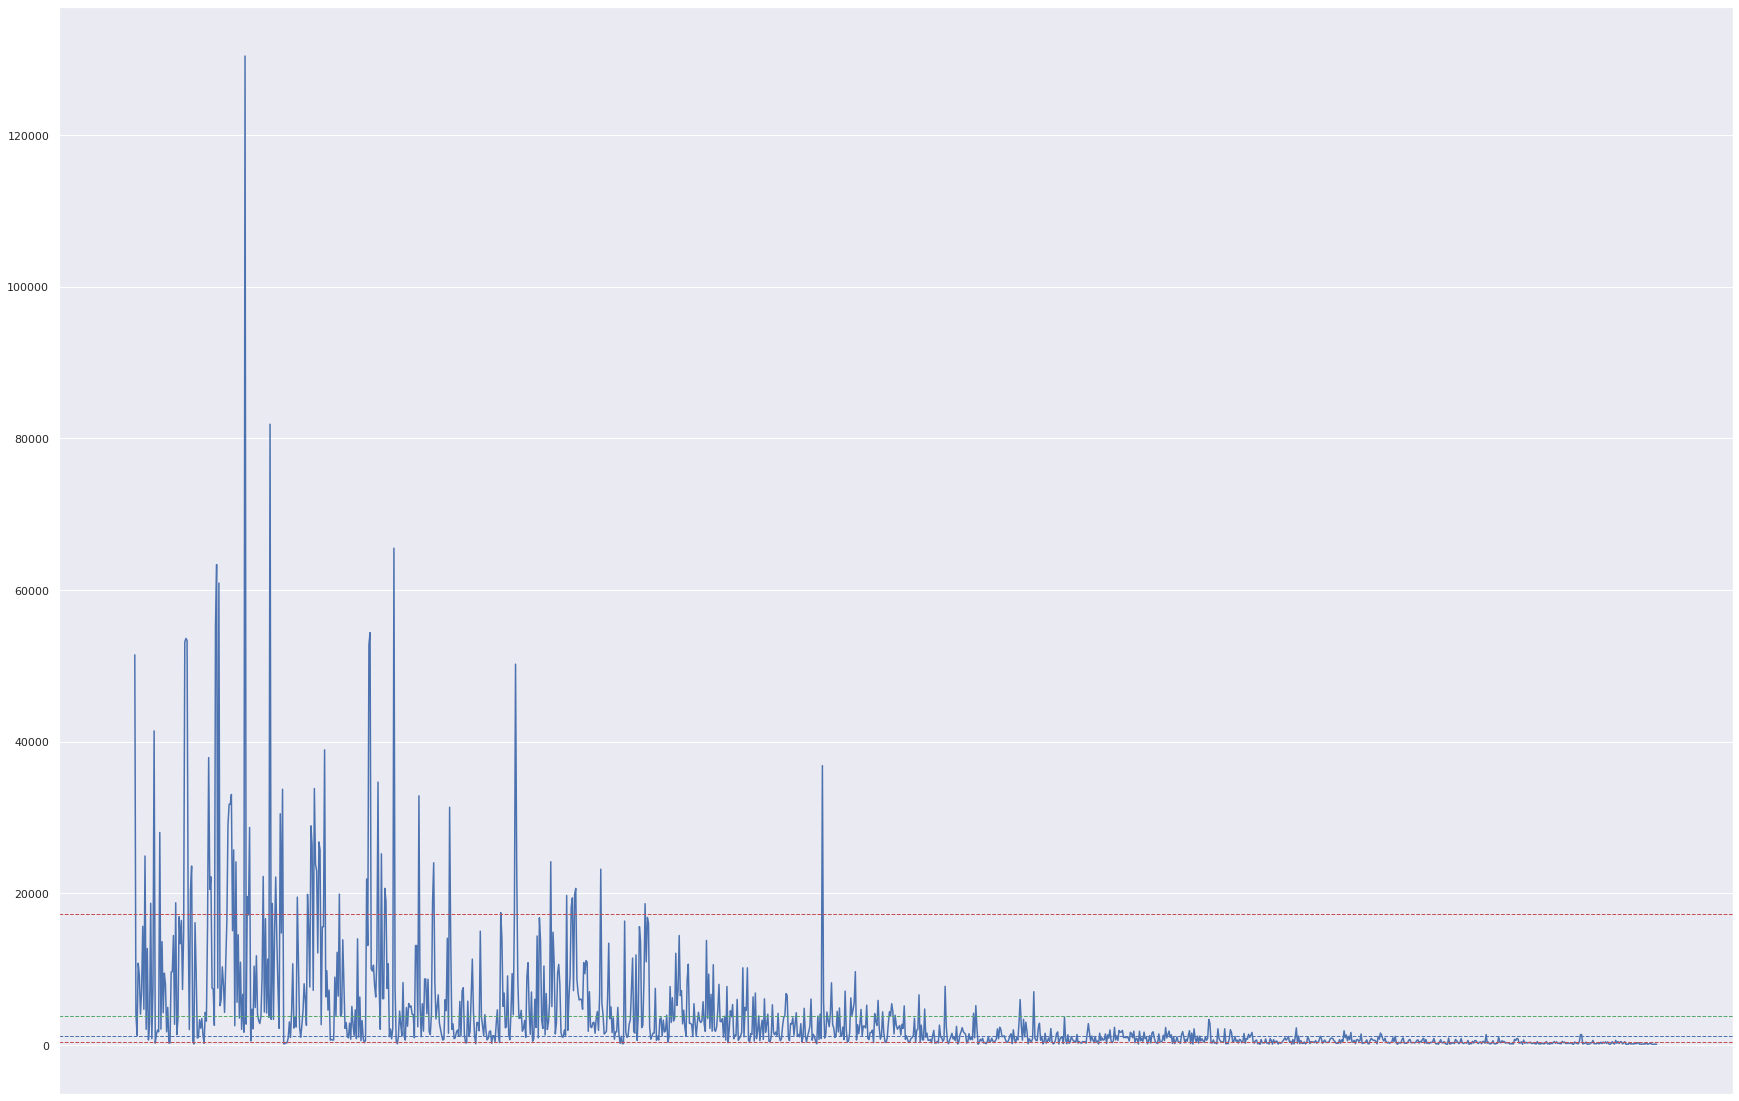

In [199]:
plt.figure(figsize=(30,20))
sns.lineplot(x = directors, y = clicks)
plt.xticks([])
plt.axhline(y=percentage[1], color='r', linewidth=1, linestyle='--') #25퍼
plt.axhline(y=percentage[2], color='b', linewidth=1, linestyle='--') #50퍼
plt.axhline(y=percentage[3], color='g', linewidth=1, linestyle='--') #75퍼
plt.axhline(y=percentage[4], color='r', linewidth=1, linestyle='--') #95퍼
plt.show()

In [183]:
import statistics

print(f'감독당 평균 클릭수: {statistics.mean(clicks)}\n 최소 클릭 감독의 클릭수: {min(clicks)}\n 최대 클릭 감독의 클릭수: {max(clicks)}')

감독당 평균 클릭수: 4035.4537313432834
 최소 클릭 감독의 클릭수: 96
 최대 클릭 감독의 클릭수: 130434


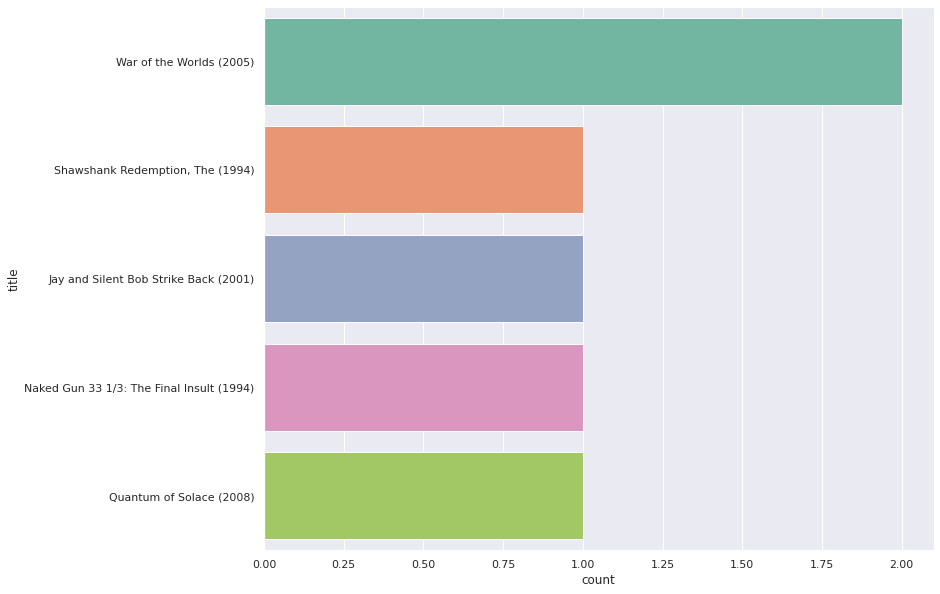

In [51]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="title", data=title_data, palette="Set2",\
                   order=title_data['title'].value_counts().index[0:5])

In [57]:
title_data['title'].value_counts()

War of the Worlds (2005)                     2
Shawshank Redemption, The (1994)             1
Jay and Silent Bob Strike Back (2001)        1
Naked Gun 33 1/3: The Final Insult (1994)    1
Quantum of Solace (2008)                     1
                                            ..
Brigadoon (1954)                             1
Son, The (Le fils) (2002)                    1
Secret Life of Walter Mitty, The (1947)      1
Them! (1954)                                 1
Girl Next Door, The (1999)                   1
Name: title, Length: 6806, dtype: int64

In [58]:
title_df['title'].value_counts()['War of the Worlds (2005)']

3200

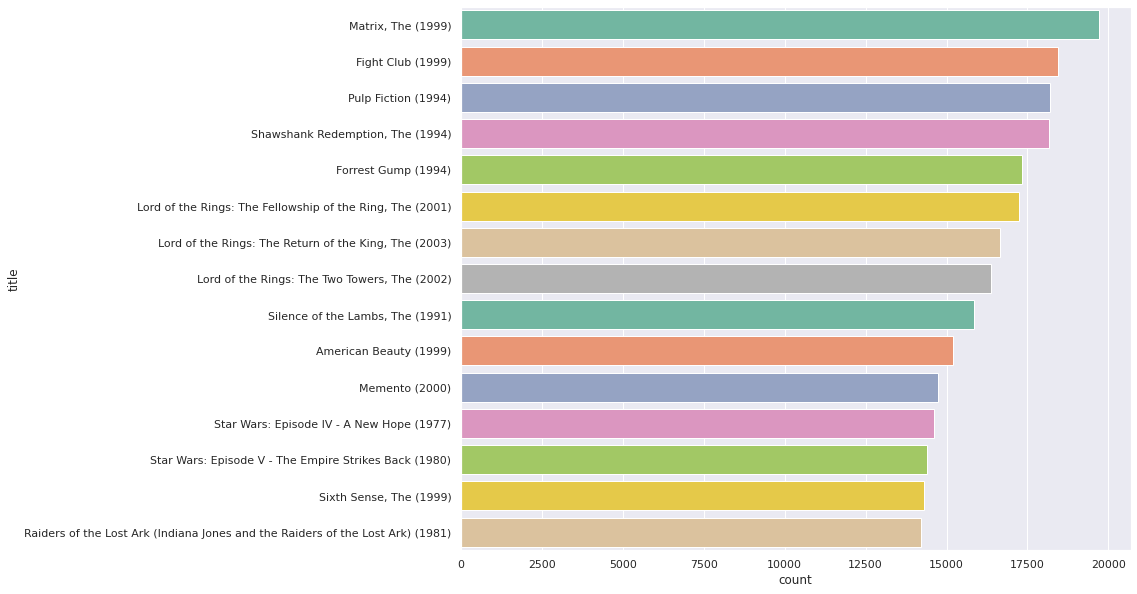

In [50]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="title", data=title_df, palette="Set2",\
                   order=title_df['title'].value_counts().index[0:15])

사용자별 탐색 - top 10

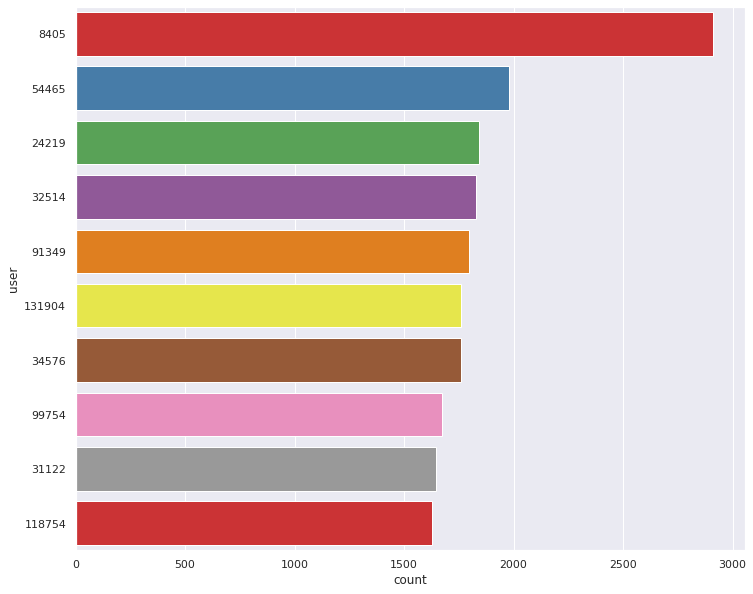

In [62]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="user", data=train_df, palette="Set1",\
                   order=train_df['user'].value_counts().index[0:10])

In [63]:
train_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

In [145]:
abusing = title_df[title_df['user'] == 8405]

In [146]:
abusing

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title
2287,8405,531,1163393949,2006-11-13 04:59:09,2006,11,4,0,"Secret Garden, The (1993)"
3273,8405,616,1175050326,2007-03-28 02:52:06,2007,3,2,2,"Aristocats, The (1970)"
4404,8405,2140,1171354763,2007-02-13 08:19:23,2007,2,8,1,"Dark Crystal, The (1982)"
6479,8405,2313,1171861325,2007-02-19 05:02:05,2007,2,5,0,"Elephant Man, The (1980)"
17163,8405,32,1160464175,2006-10-10 07:09:35,2006,10,7,1,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
...,...,...,...,...,...,...,...,...,...
5151731,8405,26796,1223599668,2008-10-10 00:47:48,2008,10,0,4,"Heart in Winter, A (Un coeur en hiver) (1992)"
5151797,8405,61678,1224212690,2008-10-17 03:04:50,2008,10,3,4,"Foot Fist Way, The (2006)"
5151849,8405,52528,1254039413,2009-09-27 08:16:53,2009,9,8,6,Tristana (1970)
5151906,8405,72703,1262324243,2010-01-01 05:37:23,2010,1,5,4,Me and Orson Welles (2008)


어뷰징의 영화 top 15

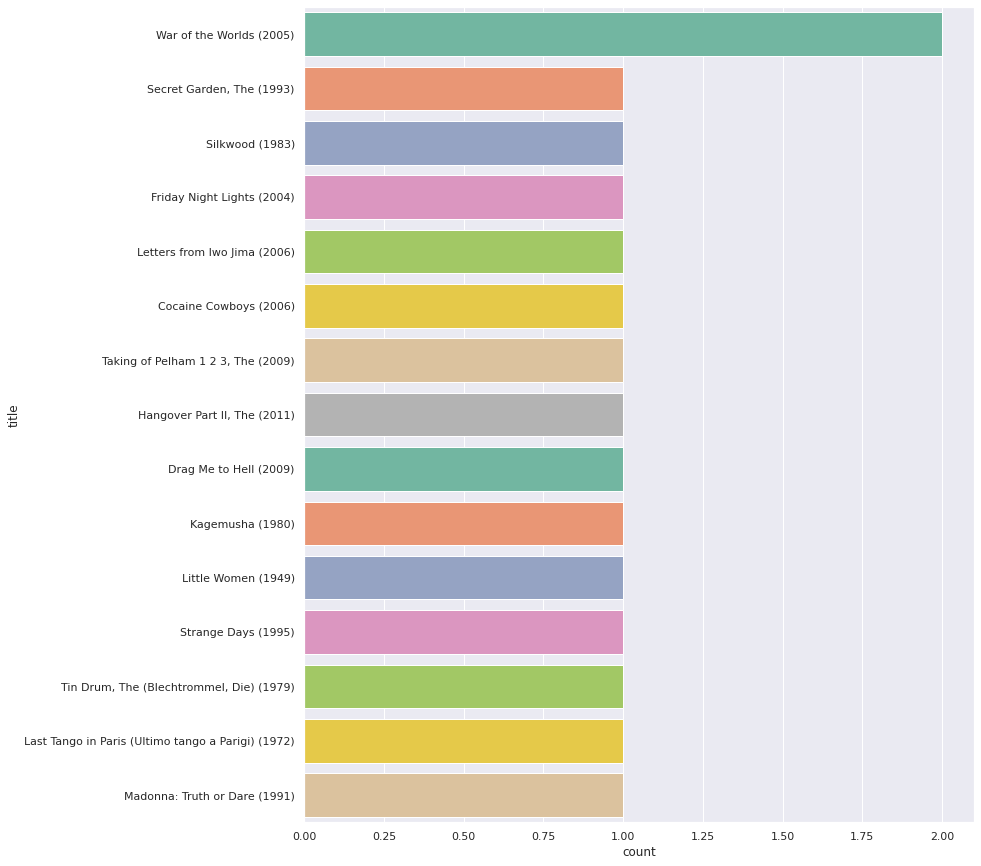

In [147]:
plt.figure(figsize=(12,15))
sns.set(style="darkgrid")
ax = sns.countplot(y="title", data=abusing, palette="Set2",\
                   order=abusing['title'].value_counts().index[0:15])

In [148]:
abusing['title'].value_counts()

War of the Worlds (2005)                          2
Secret Garden, The (1993)                         1
Silkwood (1983)                                   1
Friday Night Lights (2004)                        1
Letters from Iwo Jima (2006)                      1
                                                 ..
Witness for the Prosecution (1957)                1
Paths of Glory (1957)                             1
Little Children (2006)                            1
Rabbit Hole (2010)                                1
Kid With a Bike, The (Le gamin au vélo) (2011)    1
Name: title, Length: 2911, dtype: int64

어뷰징? 기간

In [89]:
base = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
base.sample()

,user,item,time
3690094,98372,2961,1388177867


In [111]:
len(base['user'].unique())

31360

In [96]:
max(base[base['user'] == 98372]['time'].unique())

1388787703

In [149]:
from collections import defaultdict

users = list(base['user'].unique()) # 30000만 명

dur = defaultdict(int)
# print(len(user))
for us in users:   # 40000이상 까지 for loop 이 진행 되지? - id 때문이였을 듯
    # print(us)
    l = base[base['user'] == us]['time'].unique()
    duration = max(l) - min(l)
    dur[us] = duration

In [150]:
df = pd.DataFrame(dur.values() , index = dur.keys())
df.sample(5)

,0
21968,45460
125288,1429
89081,185790366
25028,821
40382,1277690


In [151]:
df['duration'] = pd.to_datetime(df[0], unit='s')

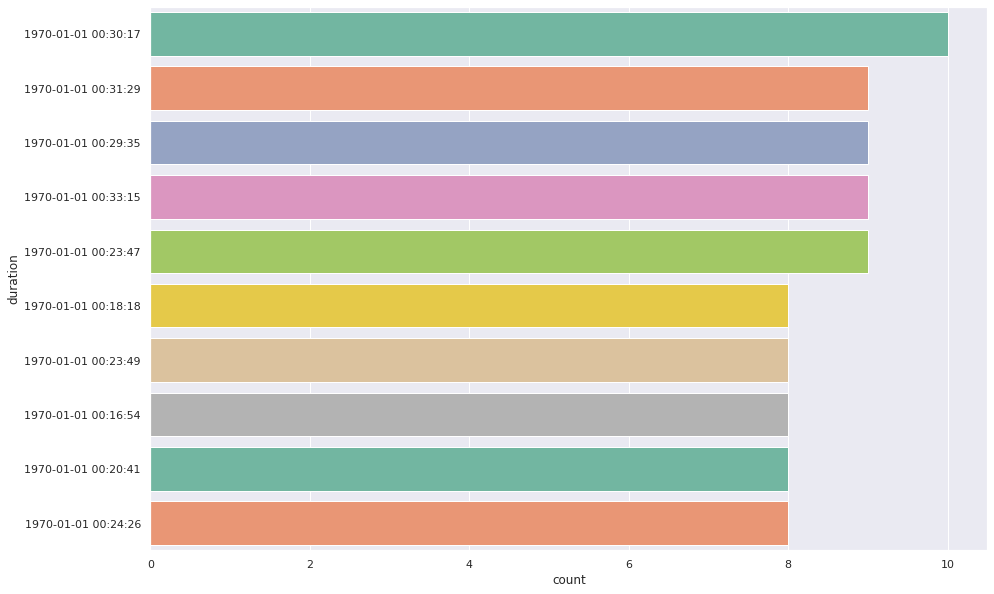

In [152]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='duration', data=df, palette="Set2",\
                   order=df['duration'].value_counts().index[0:10])

In [153]:
df.loc[8405]

0                     244351434
duration    1977-09-29 03:23:54
Name: 8405, dtype: object

유저 아이디 8405는 약 7년 10개월 동안 3000 여개의 implicit data 를 남긴 것이므로 어뷰징은 아니다..

In [154]:
df.sample(5)


,0,duration
72207,776168,1970-01-09 23:36:08
41223,4232,1970-01-01 01:10:32
112019,79278,1970-01-01 22:01:18
28567,1259,1970-01-01 00:20:59
26085,1130,1970-01-01 00:18:50
